In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import warnings
warnings.simplefilter('ignore')
# Load dataset
df = pd.read_csv(r"C:\Inspire\task 3-3\train_and_test2.csv")

# ----- Data Cleaning -----
# Drop Passengerid and zero.* columns
df_clean = df.drop(columns=[col for col in df.columns if "zero" in col or col == "Passengerid"])

# Rename target column
df_clean = df_clean.rename(columns={"2urvived": "Survived"})

# Handle missing values in Embarked (fill with mode)
df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0], inplace=True)

# Features and target
X = df_clean.drop(columns=["Survived"])
y = df_clean["Survived"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Linear Regression -----
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MSE:", mse_lr)
print("R² Score:", r2_lr)

# ----- Decision Tree Classifier -----
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)

print("\nDecision Tree Classifier:")
print("Accuracy:", acc_tree)



Linear Regression:
MSE: 0.15713996172110092
R² Score: 0.21818398692590768

Decision Tree Classifier:
Accuracy: 0.7099236641221374


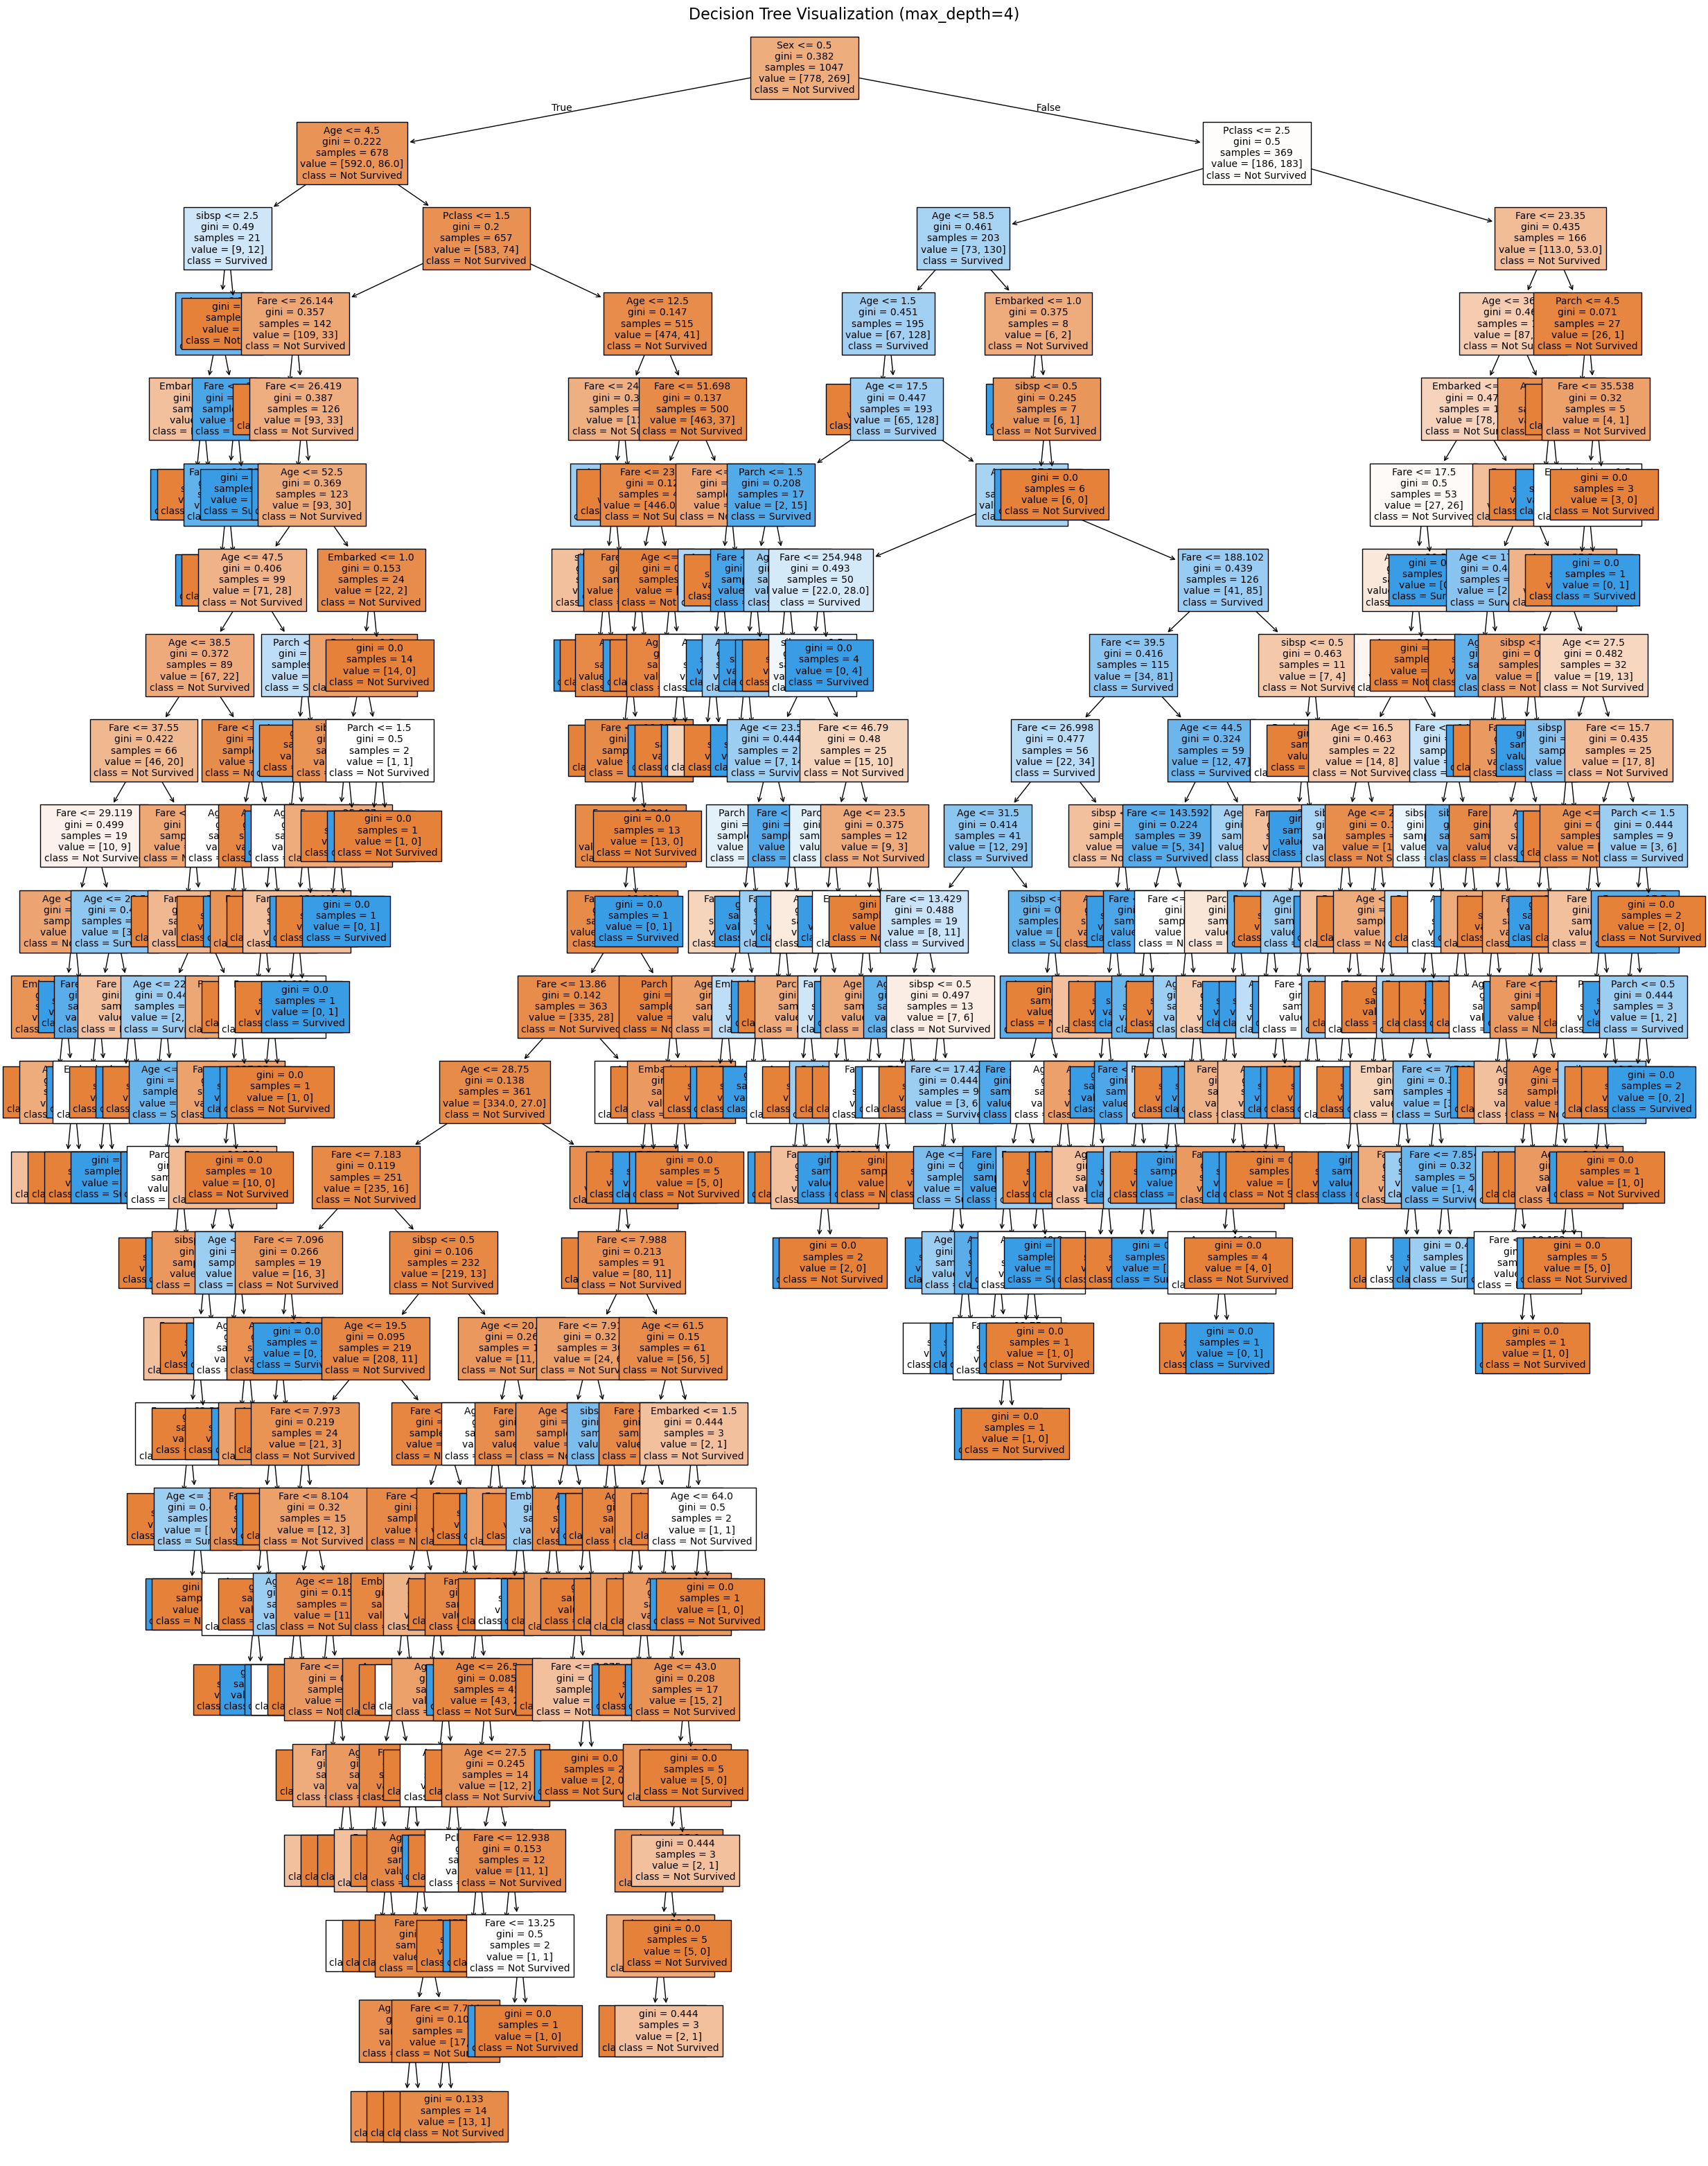

In [6]:
# 1. Decision Tree Plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 40))
plot_tree(tree_clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=4)", fontsize=16)
plt.show()

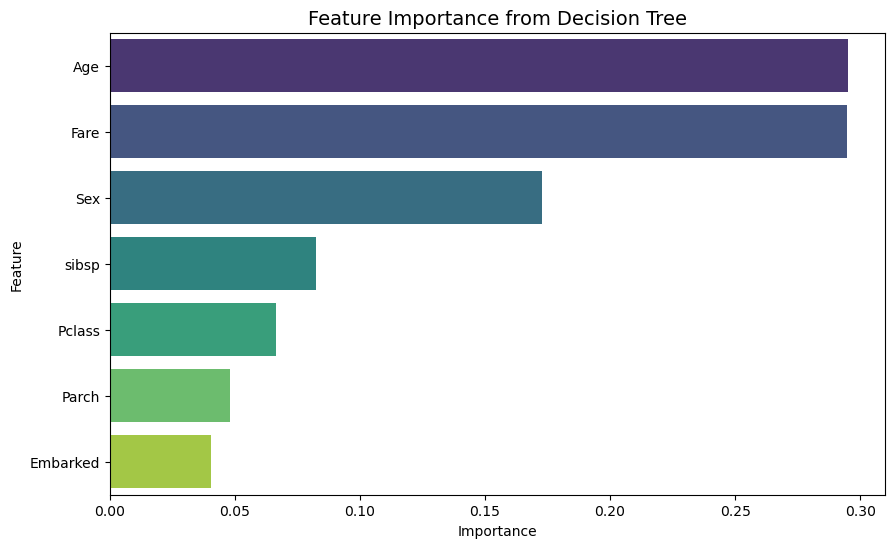

In [8]:
import seaborn as sns
importances = tree_clf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance from Decision Tree", fontsize=14)
plt.show()

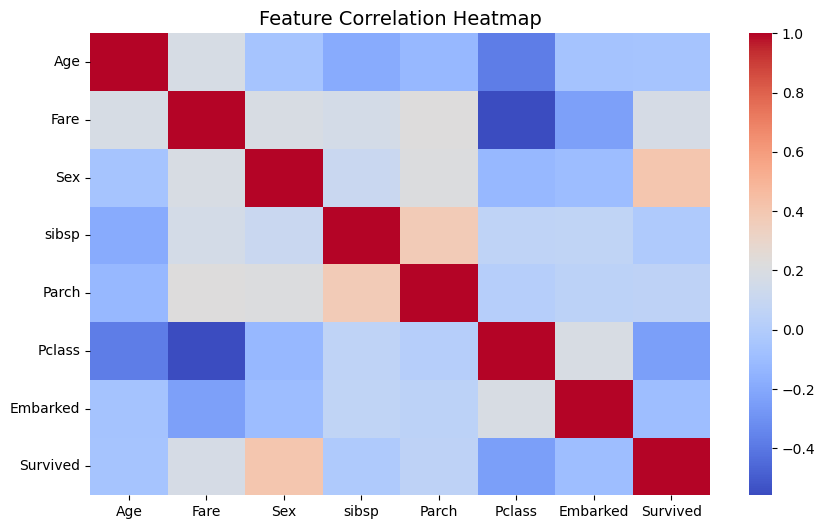

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

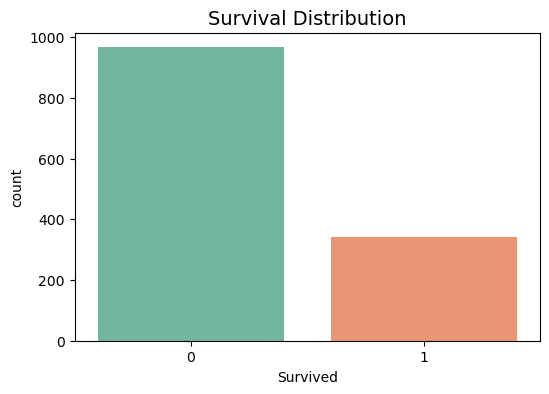

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df_clean, palette="Set2")
plt.title("Survival Distribution", fontsize=14)
plt.show()